In [13]:
%matplotlib inline
import jellyfish
import numpy as np
import matplotlib.pyplot as plt
from pygadgetreader import *
from jellyfish.profiles import *
from cosmo_tools import *

Initialize a MW galaxy using all DM profiles and compare each of the methods: density, mass, circular velocity, acceleration, escape velocity

In [40]:
#create instances of MW using each class
r = np.arange(1., 400., 0.01)
Mvir = 1e12
cvir = c_vir(0.7, Mvir)
nfw = NFW(Mvir, r, cvir)
plummer = Plummer(Mvir, r, 50.33)
hernquist = Hernquist(Mvir, r, 34.5)
isothermal = Isothermal(r, 240.)

#use Parameters from Besla07 to determine a
vc = 240.
M50kpc = 3.5e11
r50 = 50. 
a = np.sqrt(((Mvir*(r50**3))/M50kpc)**(2/3.) - r50**2)

a_hern = np.sqrt(Mvir * r50**2 / M50kpc) - r50
print a_hern
#MH = Mh2Mvir(0.2726, 0.704, Mvir) * Mvir
#cvir = c_vir(0.704, Mvir)
#rvir = r_vir(0.2726,0.704, Mvir)
#avir= ascale(0.2726, 0.704, Mvir)

34.5154254729


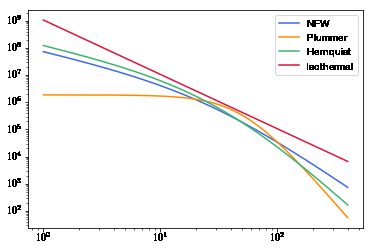

In [41]:
plt.figure()
plt.plot(r, nfw.density(), label='NFW')
plt.plot(r, plummer.density(), label='Plummer')
plt.plot(r, hernquist.density(), label='Hernquist')
plt.plot(r, isothermal.density(), label='Isothermal')
plt.yscale("log")
plt.xscale("log")
plt.legend()

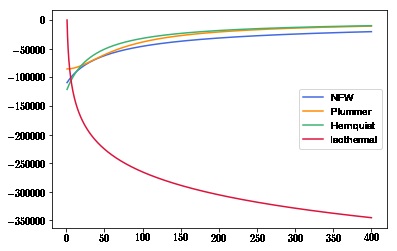

In [44]:
plt.figure()
plt.plot(r, nfw.potential(), label='NFW')
plt.plot(r, plummer.potential(), label='Plummer')
plt.plot(r, hernquist.potential(), label='Hernquist')
plt.plot(r, isothermal.potential(), label='Isothermal')
plt.legend()

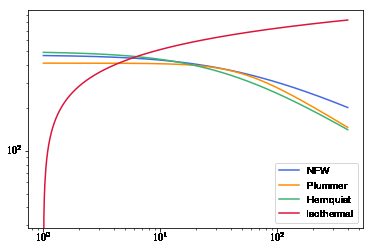

In [46]:
plt.figure()
plt.plot(r, nfw.v_esc(), label='NFW')
plt.plot(r, plummer.v_esc(), label='Plummer')
plt.plot(r, hernquist.v_esc(), label='Hernquist')
plt.plot(r, isothermal.v_esc(), label='Isothermal')
plt.yscale("log")
plt.xscale("log")
plt.legend()

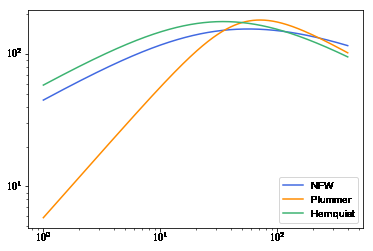

In [48]:
plt.figure()
plt.plot(r, nfw.v_rot(), label='NFW')
plt.plot(r, plummer.v_rot(), label='Plummer')
plt.plot(r, hernquist.v_rot(), label='Hernquist')
plt.yscale("log")
plt.xscale("log")
plt.legend()

In [54]:
#test the MN disk 
rs = np.arange(-50., 50., 0.1)
zs = np.arange(-20., 20., 0.05)

zz,rr = np.meshgrid(zs, rs, indexing='ij')
Mdisk = 5.5e10
adisk = 3.5
bdisk = 0.7
disk = MN(Mdisk, adisk, bdisk, rr, zz)

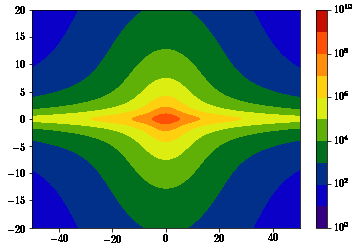

In [56]:
from matplotlib.colors import LogNorm

plt.figure()
plt.contourf(rs,zs,disk.density(),norm=LogNorm() )
plt.xlim(-50,50)
plt.ylim(-20,20)
plt.colorbar()

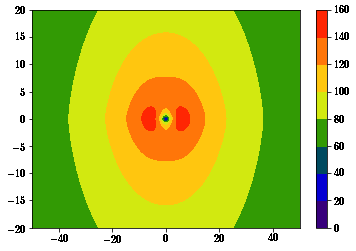

In [63]:
plt.figure()
plt.contourf(rs,zs,disk.v_rot())#,norm=LogNorm() )
plt.xlim(-50,50)
plt.ylim(-20,20)
plt.colorbar()

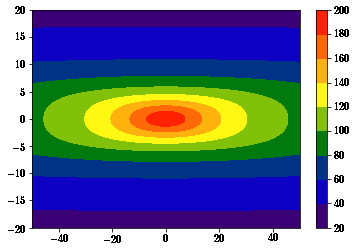

In [64]:
plt.figure()
plt.contourf(rs,zs,disk.v_esc())#,norm=LogNorm() )
plt.xlim(-50,50)
plt.ylim(-20,20)
plt.colorbar()

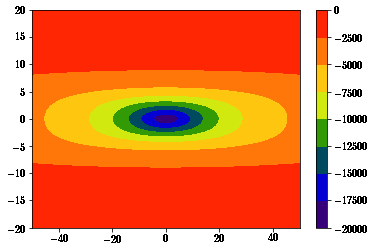

In [65]:
plt.figure()
plt.contourf(rs,zs,disk.potential())#,norm=LogNorm() )
plt.xlim(-50,50)
plt.ylim(-20,20)
plt.colorbar()